# **PORTER DELIVERY TIME ESTIMATION**

## **Regression Problem**

---
---
---

Prisiqilia Aurista Juwita


---
---
---


## **Permasalahan**

Dalam industri pengiriman dan e-commerce, durasi pengiriman adalah faktor kritis yang mempengaruhi kepuasan pelanggan. Optimalisasi waktu pengiriman sangat penting untuk meningkatkan efisiensi operasional dan memenuhi harapan pelanggan. Salah satu jasa yang sangat relevan dalam hal ini adalah pengiriman makanan cepat saji. Durasi pengiriman ini dipengaruhi oleh permintaan yang tinggi, faktor cuaca, lalu lintas, persiapan makanan serta pengiriman yang jauh. Untuk itu diasumsikan dalam penelitian ini bahwa durasi pengiriman untuk usaha makanan cepat saji tidak boleh melampaui 120 menit.


## **Tujuan Utama**
Optimalisasi waktu pengiriman makanan cepat saji. Terkait prediksi durasi pengiriman.

---

# Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat DataFrame
df = pd.read_csv('dataset.csv')

# **I. Exploratory Data Analysis**

In [ ]:
df.shape

(197428, 14)

In [4]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

In [5]:
df.tail(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0
197427,1.0,2015-02-08 19:24:33,2015-02-08 20:01:41,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,4,2605,4,425,750,20.0,20.0,23.0


## Analisis Fitur

**market_id:**

Menunjukkan pasar tempat pesanan dibuat. Fitur ini bisa membantu dalam memahami variasi waktu pengiriman berdasarkan lokasi.

**created_at dan actual_delivery_time:**

Dua kolom waktu ini penting untuk menghitung durasi pengiriman. Dengan menghitung selisih antara keduanya, dapat diperoleh waktu pengiriman yang sebenarnya.

**store_id:**

Mengidentifikasi toko tertentu. Analisis berdasarkan toko dapat mengungkap pola pengiriman, seperti kecepatan pengiriman dari berbagai restoran atau penyedia layanan.

**store_primary_category:**

Menunjukkan kategori toko, yang dapat dianalisis untuk melihat apakah jenis masakan atau kategori produk mempengaruhi waktu pengiriman.

**order_protocol:**

Metode pemesanan yang digunakan. Ini bisa jadi relevan jika ada perbedaan dalam waktu pengiriman berdasarkan cara pelanggan memesan (aplikasi, website, dll.).

**total_items, subtotal, dan num_distinct_items:**

Jumlah total item, total harga, dan jumlah item berbeda. Fitur-fitur ini bisa mempengaruhi waktu pengiriman dan biaya, karena pesanan yang lebih besar mungkin memerlukan lebih banyak waktu untuk diproses dan dikirim.

**min_item_price dan max_item_price:**

Harga item terendah dan tertinggi dalam pesanan. Ini dapat membantu dalam memahami variasi biaya berdasarkan jenis produk.

**total_onshift_partners, total_busy_partners, dan total_outstanding_orders:**

Statistik tentang mitra pengiriman. Data ini penting untuk mengukur kapasitas pengiriman dan bagaimana hal ini mempengaruhi waktu pengiriman. Misalnya, jika banyak mitra sedang sibuk, waktu pengiriman mungkin lebih lama.

In [6]:
print(df.info())  # Menampilkan informasi tipe data dan jumlah non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [7]:
# Konversi kolom ke tipe datetime
df['created_at'] = pd.to_datetime(df['created_at'])  # Mengganti tipe data
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])  # Mengganti tipe data

In [8]:
df['store_id'] = df['store_id'].astype('category').cat.codes

In [9]:
df.head(1)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,5913,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0


# **II. Data Preprocessing**

In [10]:
# Menghitung jumlah missing values
missing_values = df.isnull().sum()

# Menghitung total baris dalam DataFrame
total_rows = df.shape[0]

# Menghitung persentase missing values
missing_percentage = (missing_values / total_rows) * 100

# Membuat DataFrame untuk menampilkan hasil
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Menambahkan total missing values dan persentase
total_missing = missing_values.sum()
total_percentage = (total_missing / total_rows) * 100

# Menampilkan ringkasan
print(missing_summary)
print("Total missing values:", total_missing)
print("Total percentage of missing values: {:.2f}%".format(total_percentage))

                          Missing Values  Percentage (%)
market_id                            987        0.499929
created_at                             0        0.000000
actual_delivery_time                   7        0.003546
store_id                               0        0.000000
store_primary_category              4760        2.411006
order_protocol                       995        0.503981
total_items                            0        0.000000
subtotal                               0        0.000000
num_distinct_items                     0        0.000000
min_item_price                         0        0.000000
max_item_price                         0        0.000000
total_onshift_partners             16262        8.236927
total_busy_partners                16262        8.236927
total_outstanding_orders           16262        8.236927
Total missing values: 55535
Total percentage of missing values: 28.13%


## Keterangan
Terdapat total 28,13% missing values dan cukup signifikan bila dihapus

## Tindakan

## Penggantian data yang hilang dengan modus dan median

1. Modus sangat tepat untuk kolom kategori (seperti market_id, actual_delivery_time, store_primary_category, dan order_protocol) karena modus adalah nilai yang paling sering muncul. Ini memastikan bahwa imputasi tidak mengubah distribusi data secara signifikan.

2. Dengan mengganti nilai yang hilang dengan modus, stabilitas dalam kategori tetap terjaga dan ini juga menghindari pengenalan bias yang mungkin terjadi jika digunakan nilai acak atau rata-rata.

3. Median adalah nilai tengah dari dataset dan lebih tahan terhadap pencilan (outliers) dibandingkan dengan rata-rata. Jika kolom seperti total_onshift_partners, total_busy_partners, dan total_outstanding_orders memiliki nilai yang sangat tinggi atau rendah, median memberikan estimasi yang lebih akurat untuk nilai yang hilang.

4. Jika data tidak terdistribusi normal, menggunakan median membantu menghindari distorsi yang dapat terjadi dengan rata-rata. Ini penting untuk memastikan bahwa nilai yang dihasilkan lebih representatif dari data yang ada.

In [11]:
# Imputasi untuk kolom yang terdapat missing values
df['market_id'] = df['market_id'].fillna(df['market_id'].mode()[0])  # Mengganti dengan modus
df['actual_delivery_time']= df['actual_delivery_time'].fillna(df['actual_delivery_time'].mode()[0])  # Mengganti dengan modus
df['store_primary_category'] = df['store_primary_category'].fillna(df['store_primary_category'].mode()[0])  # Mengganti dengan modus
df['order_protocol'] = df['order_protocol'].fillna(df['order_protocol'].mode()[0])  # Mengganti dengan modus
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df['total_onshift_partners'].median())  # Mengganti dengan median
df['total_busy_partners'] = df['total_busy_partners'].fillna(df['total_busy_partners'].median())  # Mengganti dengan median
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median())  # Mengganti dengan median

In [12]:
# Verifikasi apakah nilai hilang sudah teratasi
print(df.isnull().sum())

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197428 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197428 non-null  datetime64[ns]
 3   store_id                  197428 non-null  int16         
 4   store_primary_category    197428 non-null  object        
 5   order_protocol            197428 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    197428 non-null  float64       
 12  to

## Semua data sudah terisi dilanjutkan dengan permbersihan data

In [14]:
# Memeriksa tipe data kolom
print(df.columns)
print(df.dtypes)

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')
market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                             int16
store_primary_category              object
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
dtype: object


In [15]:
print(df['store_primary_category'].unique())

['american' 'mexican' 'indian' 'italian' 'sandwich' 'thai' 'cafe' 'salad'
 'pizza' 'chinese' 'singaporean' 'burger' 'breakfast' 'mediterranean'
 'japanese' 'greek' 'catering' 'filipino' 'convenience-store' 'other'
 'korean' 'vegan' 'asian' 'barbecue' 'fast' 'dessert' 'smoothie' 'seafood'
 'vietnamese' 'cajun' 'steak' 'middle-eastern' 'soup' 'vegetarian'
 'persian' 'nepalese' 'sushi' 'latin-american' 'hawaiian' 'chocolate'
 'burmese' 'british' 'pasta' 'alcohol' 'dim-sum' 'peruvian' 'turkish'
 'malaysian' 'ethiopian' 'afghan' 'bubble-tea' 'german' 'french'
 'caribbean' 'gluten-free' 'comfort-food' 'gastropub' 'pakistani'
 'moroccan' 'spanish' 'southern' 'tapas' 'russian' 'brazilian' 'european'
 'cheese' 'african' 'argentine' 'kosher' 'irish' 'lebanese' 'belgian'
 'indonesian' 'alcohol-plus-food']


In [16]:
categories = ['american', 'mexican', 'indian', 'italian', 'sandwich', 'thai', 'cafe',
              'salad', 'pizza', 'chinese', 'singaporean', 'burger', 'breakfast',
              'mediterranean', 'japanese', 'greek', 'catering', 'filipino',
              'convenience-store', 'other', 'korean', 'vegan', 'asian', 'barbecue',
              'fast', 'dessert', 'smoothie', 'seafood', 'vietnamese', 'cajun', 'steak',
              'middle-eastern', 'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
              'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british', 'pasta',
              'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian', 'ethiopian',
              'afghan', 'bubble-tea', 'german', 'french', 'caribbean', 'gluten-free',
              'comfort-food', 'gastropub', 'pakistani', 'moroccan', 'spanish', 'southern',
              'tapas', 'russian', 'brazilian', 'european', 'cheese', 'african', 'argentine',
              'kosher', 'irish', 'lebanese', 'belgian', 'indonesian', 'alcohol-plus-food']

# Menghitung jumlah kategori unik
unique_count = len(set(categories))
print(unique_count)

74


In [17]:
# Memeriksa tipe data
print(df['market_id'].dtype)

# Memeriksa nilai unik
print(df['market_id'].unique())

float64
[1. 2. 3. 4. 5. 6.]


In [18]:
print(df['market_id'].isnull().sum())

0


In [19]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

# Menghitung jumlah baris duplikat
num_duplicates = duplicates.sum()

# Menampilkan jumlah baris duplikat
print(f'Jumlah baris duplikat: {duplicates.sum()}')


Jumlah baris duplikat: 0


In [20]:
# menerapkan one-hot encoding pada kolom market_id
df = pd.get_dummies(df, columns=['market_id'], prefix='market')

In [21]:
df.head(1)

,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,market_1.0,market_2.0,market_3.0,market_4.0,market_5.0,market_6.0
0,2015-02-06 22:24:17,2015-02-06 23:27:16,5913,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,True,False,False,False,False,False


In [22]:
# menerapkan one-hot encoding pada kolom store_primary_category
df_encoded = pd.get_dummies(df, columns=['store_primary_category'], prefix='category')

In [23]:
print(df['store_primary_category'].head(2))

0    american
1     mexican
Name: store_primary_category, dtype: object


In [24]:
print(df_encoded.head(3))

           created_at actual_delivery_time  store_id  order_protocol  \
0 2015-02-06 22:24:17  2015-02-06 23:27:16      5913             1.0   
1 2015-02-10 21:49:25  2015-02-10 22:56:29      6346             2.0   
2 2015-01-22 20:39:28  2015-01-22 21:09:09      6346             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   

   total_onshift_partners  ...  category_southern  category_spanish  \
0                    33.0  ...              False             False   
1                     1.0  ...              False             False   
2                     1.0  ...              False             False   

   category_steak  category_sushi  category_tapas  category_thai  \
0           False           False    

## Variabel Penting: Durasi Pengiriman

In [25]:
# Menambah kolom dan menghitung durasi pengiriman dalam menit
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60  # dalam menit
df['order_hour'] = df['created_at'].dt.hour  # Jam dalam hari (0-23)
df['order_day_of_week'] = df['created_at'].dt.dayofweek  # 0 = Senin, 6 = Minggu

In [26]:
# Cek missing values
print(df.isnull().sum())

created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
market_1.0                  0
market_2.0                  0
market_3.0                  0
market_4.0                  0
market_5.0                  0
market_6.0                  0
delivery_duration           0
order_hour                  0
order_day_of_week           0
dtype: int64


In [27]:
print(df.info())  # Menampilkan informasi tipe data dan jumlah non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   created_at                197428 non-null  datetime64[ns]
 1   actual_delivery_time      197428 non-null  datetime64[ns]
 2   store_id                  197428 non-null  int16         
 3   store_primary_category    197428 non-null  object        
 4   order_protocol            197428 non-null  float64       
 5   total_items               197428 non-null  int64         
 6   subtotal                  197428 non-null  int64         
 7   num_distinct_items        197428 non-null  int64         
 8   min_item_price            197428 non-null  int64         
 9   max_item_price            197428 non-null  int64         
 10  total_onshift_partners    197428 non-null  float64       
 11  total_busy_partners       197428 non-null  float64       
 12  to

In [28]:
# Analisis awal
print(df.describe())

                          created_at           actual_delivery_time  \
count                         197428                         197428   
mean   2015-02-04 22:00:09.537962752  2015-02-04 22:47:47.210765824   
min              2014-10-19 05:24:15            2015-01-21 15:58:11   
25%              2015-01-29 02:32:42            2015-01-29 03:22:14   
50%       2015-02-05 03:29:09.500000     2015-02-05 04:40:28.500000   
75%       2015-02-12 01:39:18.500000  2015-02-12 02:25:17.750000128   
max              2015-02-18 06:00:44            2015-02-19 22:45:31   
std                              NaN                            NaN   

            store_id  order_protocol    total_items       subtotal  \
count  197428.000000   197428.000000  197428.000000  197428.000000   
mean     3463.458035        2.872865       3.196391    2682.331402   
min         0.000000        1.000000       1.000000       0.000000   
25%      1701.000000        1.000000       2.000000    1400.000000   
50%      3

## Analisis awal dari 197428 baris:

Dari statistik deskriptif, ada beberapa hal yang perlu diperhatikan mengenai data pengiriman makanan cepat saji. Berikut adalah beberapa poin kunci:
1. **Durasi Pengiriman (delivery_duration)**

    Rata-rata (mean): 47.63 menit, menunjukkan bahwa sebagian besar pengiriman selesai dalam waktu yang relatif cepat, sesuai dengan harapan layanan makanan cepat saji.
    Minimum: -33011.77 menit. Ini tampaknya menunjukkan adanya kesalahan data, karena durasi pengiriman tidak seharusnya bernilai negatif.
    Maksimum: 141947.65 menit, yang juga tampaknya merupakan outlier ekstrem dan perlu ditangani.

2. **Kolom Lain yang Perlu Diperhatikan**

    total_items: Rata-rata adalah 3.20, dengan maksimum 411 item. Mungkin perlu diperiksa apakah ada kesalahan dalam pencatatan ini, terutama jika ini adalah layanan makanan cepat saji.
    min_item_price dan max_item_price: Terdapat nilai negatif dalam min_item_price (-86). Ini juga menunjukkan adanya kesalahan dalam data yang perlu diperbaiki.
    total_onshift_partners, total_busy_partners, dan total_outstanding_orders: Ada nilai negatif dalam kolom-kolom ini. Ini menunjukkan masalah dengan data yang mungkin perlu diperbaiki atau dihapus.

3. **Pengelolaan Outliers**

    Pertimbangkan untuk menggunakan metode seperti IQR atau Z-score untuk mendeteksi dan menangani outliers dengan lebih sistematis.
    Misalnya, jika menetapkan batas 120 menit untuk durasi pengiriman, maka pengiriman yang melebihi batas tersebut dianggap sebagai outlier.

4. **Statistik Hari Dalam Minggu (order_day_of_week)**

    Rata-rata adalah 3.22, yang menunjukkan bahwa banyak pengiriman terjadi pada hari Rabu (0=Senin, 6=Minggu).
    Mungkin perlu dianalisis pola pengiriman berdasarkan hari dalam seminggu untuk memahami apakah ada tren tertentu.



# Batas ambang durasi 120 menit

Membuat batas ambang pengiriman makanan cepat saji hingga 2 jam dengan beberapa alasan berikut:

1. Batas ambang 2 jam memberikan fleksibilitas untuk menangani lonjakan permintaan tanpa mengecewakan pelanggan.

2. Faktor eksternal seperti cuaca buruk atau kemacetan lalu lintas dapat memengaruhi durasi pengiriman. Dengan batas 2 jam, pelanggan diharapkan memahami bahwa keadaan di luar kendali pengemudi dapat mempengaruhi waktu pengiriman.

3. Dalam beberapa kasus, makanan mungkin perlu dipersiapkan dengan lebih teliti atau dimasak sesuai pesanan. Waktu tambahan dapat memberikan ruang untuk memastikan kualitas dan kesegaran makanan.

4. Jika restoran melayani area yang lebih luas, pengiriman mungkin memerlukan waktu lebih lama. Batas ambang yang lebih tinggi mengakomodasi jarak tempuh yang lebih jauh.

In [29]:
# Menandai outliers
df['is_outlier'] = df['delivery_duration'] > 120  # 120 menit

# Menghitung jumlah pengiriman yang merupakan outlier
num_outliers = df['is_outlier'].sum()
print(f"Jumlah pengiriman yang dianggap outlier: {num_outliers}")


Jumlah pengiriman yang dianggap outlier: 1090


In [30]:
# Menghitung Q1 dan Q3
Q1 = df['delivery_duration'].quantile(0.25)
Q3 = df['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
df['is_outlier'] = (df['delivery_duration'] < lower_bound) | (df['delivery_duration'] > upper_bound)  # Tanda kurung ditutup

# Menghitung jumlah outlier
num_outliers = df['is_outlier'].sum()
print(f"Jumlah pengiriman yang dianggap outlier: {num_outliers}")


Jumlah pengiriman yang dianggap outlier: 6285


In [31]:
# Ambang untuk outlier positif dan negatif
positive_threshold = 120
negative_threshold = 0

# Menghitung jumlah outlier positif
outlier_positive_count = df[df['delivery_duration'] > positive_threshold].shape[0]

# Menghitung jumlah outlier negatif
outlier_negative_count = df[df['delivery_duration'] < negative_threshold].shape[0]

# Total outlier
total_outliers = outlier_positive_count + outlier_negative_count

print(f'Jumlah outlier positif: {outlier_positive_count}')
print(f'Jumlah outlier negatif: {outlier_negative_count}')
print(f'Total jumlah pengiriman yang dianggap outlier: {total_outliers}')

Jumlah outlier positif: 1090
Jumlah outlier negatif: 7
Total jumlah pengiriman yang dianggap outlier: 1097


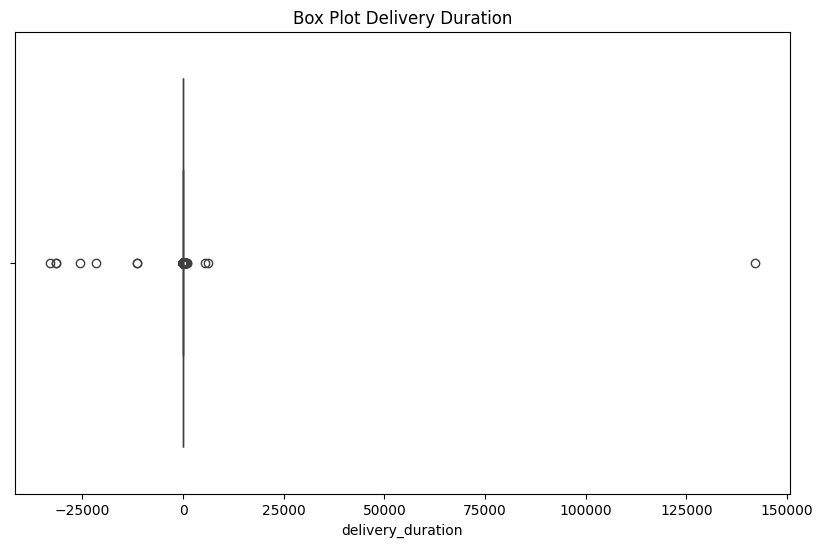

In [32]:
# Box plot untuk visualisasi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['delivery_duration'])
plt.title('Box Plot Delivery Duration')
plt.show()

In [33]:
# statistik deskriptif dari fitur-fitur baru yang ditambahkan untuk memahami sebaran datanya.
print(df.describe())

                          created_at           actual_delivery_time  \
count                         197428                         197428   
mean   2015-02-04 22:00:09.537962752  2015-02-04 22:47:47.210765824   
min              2014-10-19 05:24:15            2015-01-21 15:58:11   
25%              2015-01-29 02:32:42            2015-01-29 03:22:14   
50%       2015-02-05 03:29:09.500000     2015-02-05 04:40:28.500000   
75%       2015-02-12 01:39:18.500000  2015-02-12 02:25:17.750000128   
max              2015-02-18 06:00:44            2015-02-19 22:45:31   
std                              NaN                            NaN   

            store_id  order_protocol    total_items       subtotal  \
count  197428.000000   197428.000000  197428.000000  197428.000000   
mean     3463.458035        2.872865       3.196391    2682.331402   
min         0.000000        1.000000       1.000000       0.000000   
25%      1701.000000        1.000000       2.000000    1400.000000   
50%      3

# Analisis Statistik

 Dari ringkasan statistik yang diberikan, ada beberapa nilai yang terlihat mencurigakan, terutama nilai minimum untuk beberapa kolom, seperti:
1. min_item_price: -86
2. total_onshift_partners: -4
3. total_busy_partners: -5
4. total_outstanding_orders: -6
5. delivery_duration: -33011.77 yang negatif ekstrim dan 141947 yang positif ekstrim, dalam konteks ini tidak logis.

Untuk memperbaiki masalah ini, perlu sekali lagi dilakukan pembersihan data.

In [34]:
# Mengganti nilai negatif dengan 0 untuk kolom partners
df['total_onshift_partners'] = df['total_onshift_partners'].where(df['total_onshift_partners'] >= 0, 0)
df['total_busy_partners'] = df['total_busy_partners'].where(df['total_busy_partners'] >= 0, 0)
df['total_outstanding_orders'] = df['total_outstanding_orders'].where(df['total_outstanding_orders'] >= 0, 0)

# Menampilkan hasil untuk memastikan perubahan
print("Data Setelah Mengganti Nilai Negatif dengan 0:")
print(df[['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']].describe())

Data Setelah Mengganti Nilai Negatif dengan 0:
       total_onshift_partners  total_busy_partners  total_outstanding_orders
count           197428.000000        197428.000000             197428.000000
mean                44.165144            41.102422                 56.646291
std                 33.143570            30.866536                 50.662949
min                  0.000000             0.000000                  0.000000
25%                 19.000000            17.000000                 19.000000
50%                 37.000000            34.000000                 41.000000
75%                 62.000000            59.000000                 80.000000
max                171.000000           154.000000                285.000000


## *Mengganti nilai negatif pada min_item_price dengan 0 (karena dianggap potongan harga yang lebih masuk akal)*

In [35]:
# Mengganti nilai negatif pada min_item_price dengan 0
df['min_item_price'] = df['min_item_price'].where(df['min_item_price'] >= 0, 0)

# Menampilkan hasil untuk memastikan perubahan
print("Data Setelah Mengganti Nilai Negatif pada min_item_price dengan 0:")
print(df[['total_items','min_item_price']].describe())

Data Setelah Mengganti Nilai Negatif pada min_item_price dengan 0:
         total_items  min_item_price
count  197428.000000   197428.000000
mean        3.196391      686.220404
std         2.666546      522.036014
min         1.000000        0.000000
25%         2.000000      299.000000
50%         3.000000      595.000000
75%         4.000000      949.000000
max       411.000000    14700.000000


min item price ada nilai maks 14700 dan hal ini mungkin terjadi karena jumlah total item yang besar

# Identifikasi Outlier

In [36]:
from scipy import stats

# identifikasi outlier di kolom delivery_duration

# Menghitung Z-score
z_scores = stats.zscore(df['delivery_duration'])  # Ganti dengan kolom yang ingin dianalisis

# Mengidentifikasi outlier
outliers_z = df[(z_scores < -3) | (z_scores > 3)]

# Menampilkan outlier
print(outliers_z)

                created_at actual_delivery_time  store_id  \
109    2015-02-10 21:51:54  2015-01-24 03:41:03      5770   
2690   2014-10-19 05:24:15  2015-01-25 19:11:54      2781   
7670   2015-02-08 02:54:42  2015-01-24 03:41:03       598   
27189  2015-02-16 02:24:09  2015-02-19 22:45:31      5617   
78511  2015-02-15 02:15:45  2015-01-24 03:41:03       900   
115982 2015-02-16 01:52:49  2015-01-24 03:41:03      4943   
140635 2015-02-15 02:21:42  2015-01-24 03:41:03       405   
158967 2015-02-01 01:21:29  2015-01-24 03:41:03      6595   
170416 2015-02-01 01:36:33  2015-01-24 03:41:03      2911   
185550 2015-01-28 08:34:06  2015-02-01 16:25:25       669   

       store_primary_category  order_protocol  total_items  subtotal  \
109                  sandwich             3.0            1      1125   
2690                  italian             1.0            1      1695   
7670                 japanese             2.0            4      2860   
27189                  indian           

In [37]:
# Menghitung Q1 dan Q3
Q1 = df['delivery_duration'].quantile(0.25)
Q3 = df['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outlier
outliers_iqr = df[(df['delivery_duration'] < (Q1 - 1.5 * IQR)) | (df['delivery_duration'] > (Q3 + 1.5 * IQR))]

# Menampilkan outlier
print(outliers_iqr)

                created_at actual_delivery_time  store_id  \
11     2015-02-16 04:19:33  2015-02-16 06:34:00      6346   
23     2015-02-02 05:27:49  2015-02-02 07:05:09      6127   
24     2015-02-16 02:21:20  2015-02-16 03:54:14      6127   
88     2015-02-05 20:05:59  2015-02-05 21:39:16      4496   
109    2015-02-10 21:51:54  2015-01-24 03:41:03      5770   
...                    ...                  ...       ...   
197371 2015-02-02 21:54:04  2015-02-02 23:41:51      4512   
197382 2015-02-11 22:47:15  2015-02-12 00:32:29      4512   
197386 2015-02-02 21:23:44  2015-02-02 23:08:50      4512   
197414 2015-02-03 02:07:26  2015-02-03 04:22:00      4512   
197418 2015-01-30 20:50:23  2015-01-30 22:24:38      4512   

       store_primary_category  order_protocol  total_items  subtotal  \
11                   american             1.0            2      2200   
23                    italian             1.0            7     14900   
24                    italian             1.0      

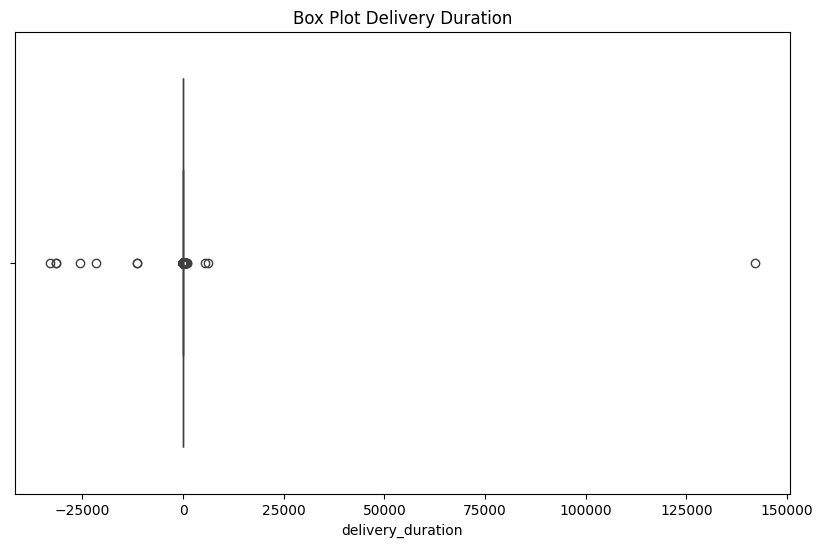

In [38]:
# Box plot untuk visualisasi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['delivery_duration'])
plt.title('Box Plot Delivery Duration')
plt.show()

### Asumsi bahwa untuk durasi pengiriman makanan cepat saji tidak boleh melampaui 120 menit dan tidak boleh negatif

In [39]:
# Hitung rata-rata durasi pengiriman yang tidak dianggap outlier dan tidak negatif
mean_delivery_duration = df[(df['delivery_duration'] <= 120) & (df['delivery_duration'] >= 0)]['delivery_duration'].mean()

# Ganti nilai outlier (lebih dari 120) dan nilai negatif dengan rata-rata
df.loc[(df['delivery_duration'] > 120) | (df['delivery_duration'] < 0), 'delivery_duration'] = mean_delivery_duration

# Cek hasil
print(df['delivery_duration'].describe())

count    197428.000000
mean         47.097709
std          16.884139
min           1.683333
25%          35.066667
50%          44.333333
75%          56.000000
max         119.933333
Name: delivery_duration, dtype: float64


### Durasi pengiriman sudah terlihat masuk akal

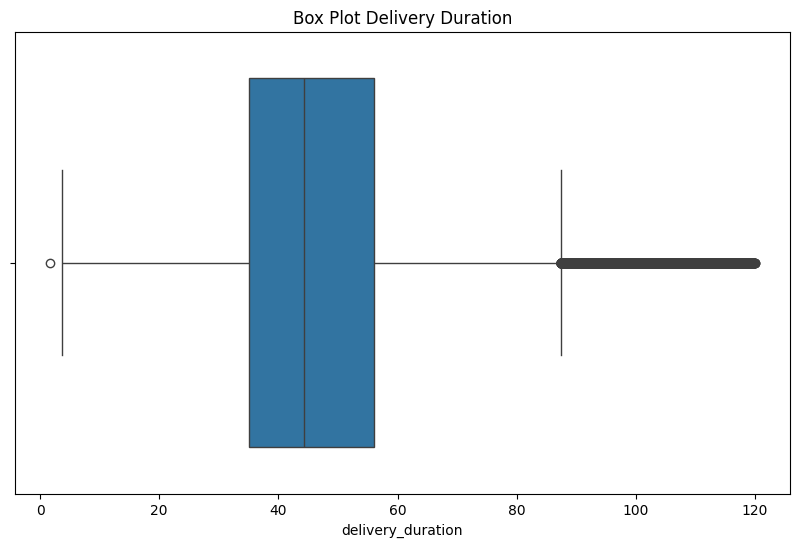

In [40]:
# Visualisasi setelah menangani outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['delivery_duration'])
plt.title('Box Plot Delivery Duration')
plt.show()

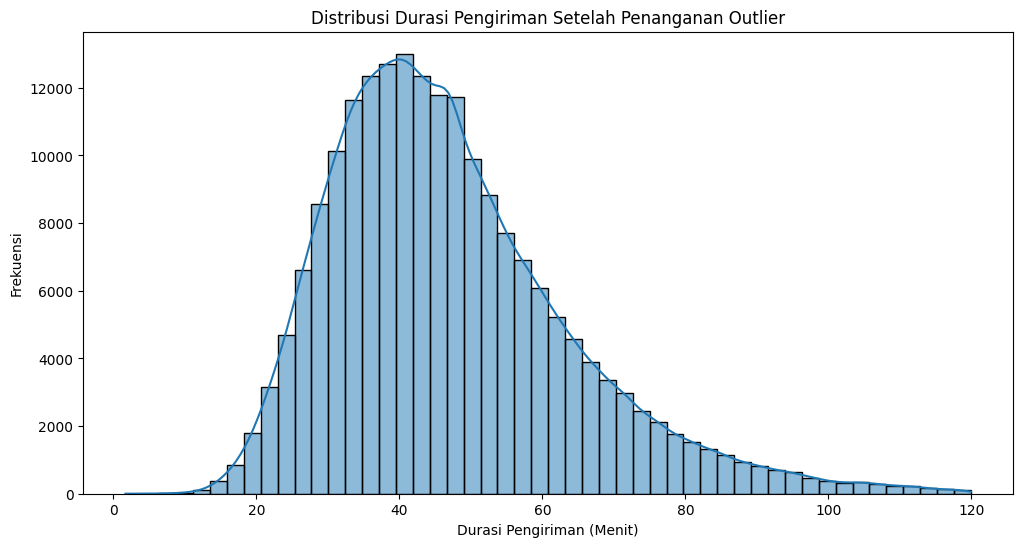

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df['delivery_duration'], bins=50, kde=True)
plt.title('Distribusi Durasi Pengiriman Setelah Penanganan Outlier')
plt.xlabel('Durasi Pengiriman (Menit)')
plt.ylabel('Frekuensi')
plt.show()

In [42]:
# Statistik deskriptif setelah penanganan outlier
print(df['delivery_duration'].describe())

count    197428.000000
mean         47.097709
std          16.884139
min           1.683333
25%          35.066667
50%          44.333333
75%          56.000000
max         119.933333
Name: delivery_duration, dtype: float64


In [43]:
# Deteksi outlier tambahan
Q1 = df['delivery_duration'].quantile(0.25)
Q3 = df['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['delivery_duration'] < lower_bound) | (df['delivery_duration'] > upper_bound)]
print(f'Jumlah outlier tambahan yang ditemukan: {len(outliers)}')

Jumlah outlier tambahan yang ditemukan: 5541


### Outlier tambahan masih di bawah harga ambang (tidak mengapa) dan jumlahnya hanya  (=5541/197428) = 2.8%

In [44]:
# Tinjau outlier tambahan apakah ada pola tertentu? Apakah mereka terjadi pada waktu tertentu, kategori tertentu, atau kondisi lainnya?
outliers_additional = df[(df['delivery_duration'] < lower_bound) | (df['delivery_duration'] > upper_bound)]
print(outliers_additional[['created_at', 'delivery_duration']].head(5))

             created_at  delivery_duration
16  2015-02-06 00:42:42          87.783333
23  2015-02-02 05:27:49          97.333333
24  2015-02-16 02:21:20          92.900000
88  2015-02-05 20:05:59          93.283333
117 2015-01-26 20:18:34          96.166667


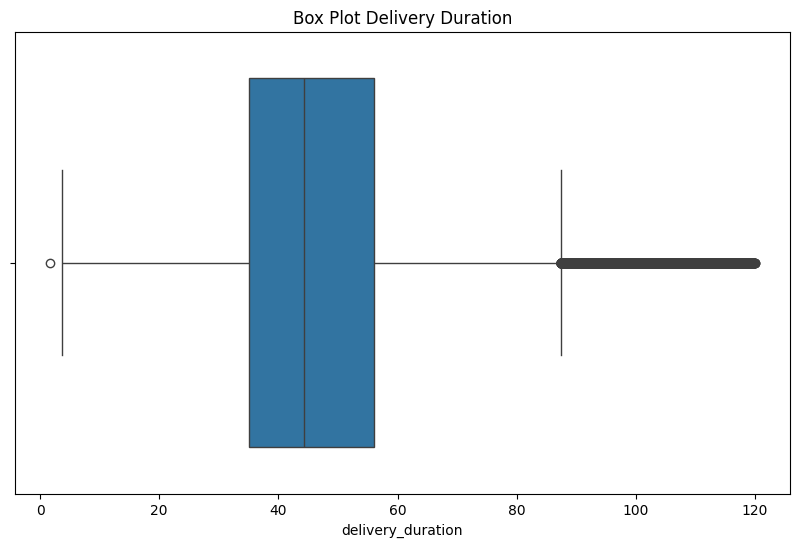

In [45]:
# Box plot untuk visualisasi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['delivery_duration'])
plt.title('Box Plot Delivery Duration')
plt.show()

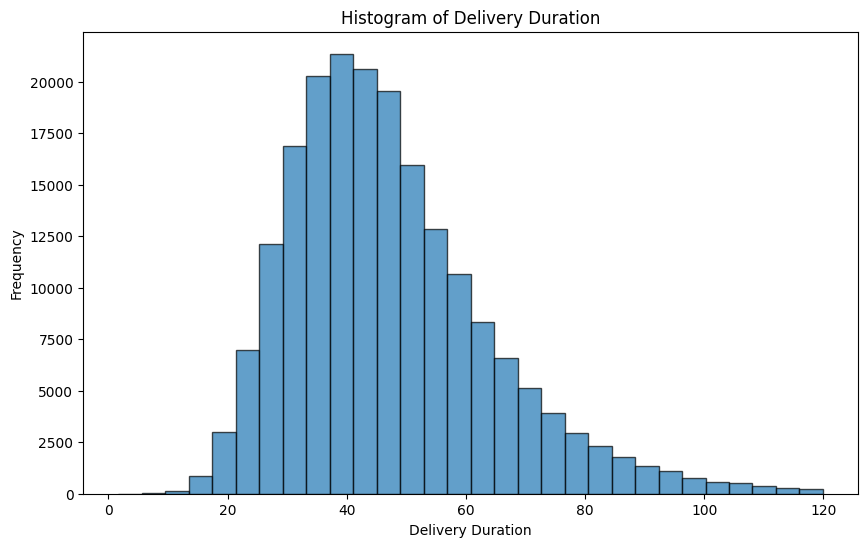

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['delivery_duration'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Delivery Duration')
plt.xlabel('Delivery Duration')
plt.ylabel('Frequency')
plt.show()

In [47]:
print(df.dtypes)


created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                             int16
store_primary_category              object
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
market_1.0                            bool
market_2.0                            bool
market_3.0                            bool
market_4.0                            bool
market_5.0                            bool
market_6.0                            bool
delivery_duration                  float64
order_hour                           int32
order_day_of_week                    int32
is_outlier                            bool
dtype: obje

In [48]:
print(df.describe())

                          created_at           actual_delivery_time  \
count                         197428                         197428   
mean   2015-02-04 22:00:09.537962752  2015-02-04 22:47:47.210765824   
min              2014-10-19 05:24:15            2015-01-21 15:58:11   
25%              2015-01-29 02:32:42            2015-01-29 03:22:14   
50%       2015-02-05 03:29:09.500000     2015-02-05 04:40:28.500000   
75%       2015-02-12 01:39:18.500000  2015-02-12 02:25:17.750000128   
max              2015-02-18 06:00:44            2015-02-19 22:45:31   
std                              NaN                            NaN   

            store_id  order_protocol    total_items       subtotal  \
count  197428.000000   197428.000000  197428.000000  197428.000000   
mean     3463.458035        2.872865       3.196391    2682.331402   
min         0.000000        1.000000       1.000000       0.000000   
25%      1701.000000        1.000000       2.000000    1400.000000   
50%      3

# Cek pada jam berapa saja pesanan terjadi.

In [ ]:
order_hour_counts = df['order_hour'].value_counts().sort_index()
print(order_hour_counts)

order_hour
0     12669
1     28190
2     36976
3     27068
4     15250
5      7096
6      1416
7        11
8         2
14       40
15      538
16     2109
17     3413
18     5100
19    13541
20    15560
21    11465
22     8821
23     8163
Name: count, dtype: int64


In [ ]:
order_hour_percentage = df['order_hour'].value_counts(normalize=True).sort_index() * 100
print(order_hour_percentage)

order_hour
0      6.417023
1     14.278623
2     18.728853
3     13.710315
4      7.724335
5      3.594222
6      0.717223
7      0.005572
8      0.001013
14     0.020261
15     0.272504
16     1.068238
17     1.728731
18     2.583220
19     6.858703
20     7.881354
21     5.807180
22     4.467958
23     4.134672
Name: proportion, dtype: float64


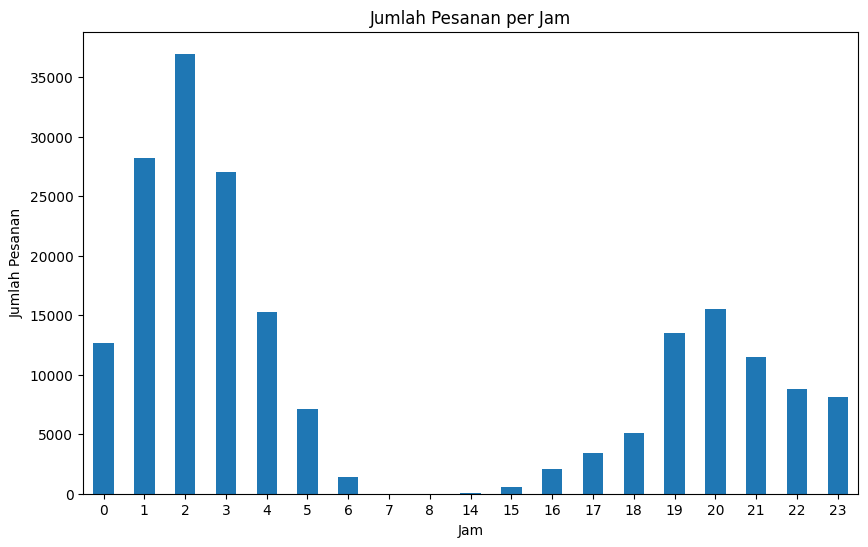

In [ ]:
plt.figure(figsize=(10, 6))
order_hour_counts.plot(kind='bar')
plt.title('Jumlah Pesanan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=0)
plt.show()

In [ ]:
unique_hours = df['order_hour'].unique()
print(sorted(unique_hours))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


## *Tidak ada pesanan antara jam 08.00 sampai 14.00*

In [49]:
# Cek pesanan pada hari-hari tertentu
order_day_counts = df['order_day_of_week'].value_counts().sort_index()
print(order_day_counts)

order_day_of_week
0    27403
1    24062
2    24254
3    25673
4    27875
5    34541
6    33620
Name: count, dtype: int64


In [50]:
order_day_percentage = df['order_day_of_week'].value_counts(normalize=True).sort_index() * 100
print(order_day_percentage)

order_day_of_week
0    13.879997
1    12.187734
2    12.284985
3    13.003728
4    14.119071
5    17.495492
6    17.028993
Name: proportion, dtype: float64


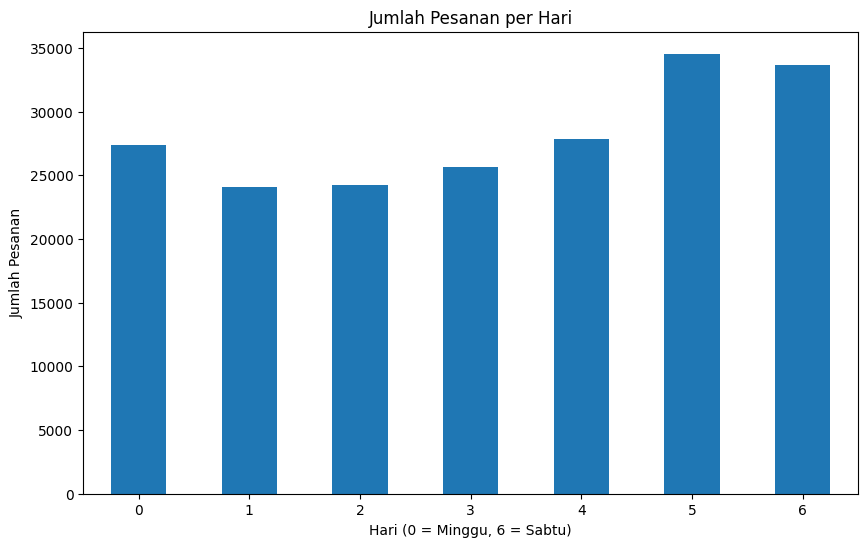

In [51]:
plt.figure(figsize=(10, 6))
order_day_counts.plot(kind='bar')
plt.title('Jumlah Pesanan per Hari')
plt.xlabel('Hari (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=0)
plt.show()


## Cek jumlah pesanan pada bulan Oktober, Januari, dan Februari

In [52]:
# Ekstrak bulan dan tahun
df['month'] = df['created_at'].dt.to_period('M')

In [53]:
monthly_orders = df['month'].value_counts().sort_index()
print(monthly_orders)

month
2014-10         1
2015-01     68482
2015-02    128945
Freq: M, Name: count, dtype: int64


*## Sebagian besar pesanan dilakukan pada bulan Januari dan Februari. Karena data pada bulan Oktober hanya 1, maka dihapus karena dianggap sebagai outlier.*

In [54]:
df = df[df['month'] != '2014-10'] # Menghapus satu data di bulan Oktober

In [55]:
df['month'] = df['created_at'].dt.to_period('M')

In [56]:
# Ekstrak bulan dari 'created_at'
df['order_month'] = df['created_at'].dt.month

# Menampilkan ringkasan statistik dari kolom yang baru ditambahkan
print(df[['delivery_duration', 'order_hour', 'order_day_of_week', 'order_month']].describe())

       delivery_duration     order_hour  order_day_of_week    order_month
count      197427.000000  197427.000000      197427.000000  197427.000000
mean           47.097709       8.467231           3.218952       1.653127
std            16.884181       8.658777           2.045785       0.475976
min             1.683333       0.000000           0.000000       1.000000
25%            35.066667       2.000000           1.000000       1.000000
50%            44.333333       3.000000           3.000000       2.000000
75%            56.000000      19.000000           5.000000       2.000000
max           119.933333      23.000000           6.000000       2.000000


In [57]:
print(df.describe())

                          created_at           actual_delivery_time  \
count                         197427                         197427   
mean   2015-02-04 22:00:57.104681728  2015-02-04 22:47:51.652677120   
min              2015-01-21 15:22:03            2015-01-21 15:58:11   
25%       2015-01-29 02:32:44.500000     2015-01-29 03:22:16.500000   
50%              2015-02-05 03:29:12            2015-02-05 04:40:29   
75%              2015-02-12 01:39:19     2015-02-12 02:25:18.500000   
max              2015-02-18 06:00:44            2015-02-19 22:45:31   
std                              NaN                            NaN   

            store_id  order_protocol    total_items       subtotal  \
count  197427.000000   197427.000000  197427.000000  197427.000000   
mean     3463.461492        2.872875       3.196402    2682.336403   
min         0.000000        1.000000       1.000000       0.000000   
25%      1701.000000        1.000000       2.000000    1400.000000   
50%      3

# Ringkasan Statistik
Berdasarkan ringkasan statistik, khususnya untuk durasi pengiriman dan fitur-fitur lainnya:

1. **Durasi Pengiriman (delivery_duration)**
Rata-rata: 47.10 menit; Minimum: 1.68 menit; Maksimum: 120 menit; Standar Deviasi: 16.88 menit;
Distribusi durasi pengiriman menunjukkan bahwa sebagian besar pesanan berada di kisaran sekitar 35-56 menit.

2. **Subtotal**
Rata-rata: 2682.34; Minimum: 0; Maksimum: 27100;
Variasi besar dalam subtotal menunjukkan ada pesanan dengan nilai yang sangat tinggi, yang mungkin merupakan faktor penting dalam durasi pengiriman.

3. **Jumlah Item (total_items)**
Rata-rata: 3.20 item per pesanan, dengan maksimum 411 item.
Ini mungkin menunjukkan beberapa pesanan besar yang memerlukan lebih banyak waktu untuk diproses.

4. **Waktu Pesanan (order_hour)**
Rata-rata: 8.47 (berarti rata-rata pemesanan terjadi sekitar jam 8 pagi).
Jam Terkecil: 0 (midnight) dan Maksimum: 23 (11 malam).
Ini bisa memberikan wawasan mengenai waktu pemesanan yang sibuk.

5. **Hari Dalam Seminggu (order_day_of_week)** Rata-rata: 3.22 (kemungkinan hari Rabu jika menggunakan 0 untuk Senin).
Ini menunjukkan bahwa sebagian besar pemesanan terjadi di tengah minggu.

# Analisis Regresi

Dengan fokus pada prediksi durasi pengiriman, beberapa fitur yang dapat dipertimbangkan untuk model regresi meliputi:

1. Subtotal: Ada kemungkinan bahwa subtotal yang lebih tinggi berhubungan dengan durasi pengiriman yang lebih lama.
2. Jumlah item: Lebih banyak item mungkin mempengaruhi waktu pengemasan dan pengiriman.
Waktu dan hari pemesanan: Mungkin ada tren dalam durasi pengiriman berdasarkan waktu dan hari tertentu.

# Rekomendasi untuk Model:
Penggunaan Metode Regresi yang Berbeda: regresi linier, regresi non linier, dan metode lain untuk melihat mana yang memberikan hasil terbaik.






## Uji Statistik:
### Apakah ada perbedaan durasi pengiriman pada bulan Januari dan Februari

In [58]:
# Memisahkan DataFrame untuk pesanan bulan Januari dan Februari
january_data = df[df['order_month'] == 1]['delivery_duration']
february_data = df[df['order_month'] == 2]['delivery_duration']

# Hitung rata-rata dan deviasi standar
january_mean = january_data.mean()
february_mean = february_data.mean()
january_std = january_data.std()
february_std = february_data.std()

print(f'Januari - Rata-rata: {january_mean}, Std Dev: {january_std}')
print(f'Februari - Rata-rata: {february_mean}, Std Dev: {february_std}')

# Uji t untuk dua sampel independen
t_stat, p_value = stats.ttest_ind(january_data, february_data)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

Januari - Rata-rata: 45.65925564413033, Std Dev: 16.162652724591535
Februari - Rata-rata: 47.861664361160116, Std Dev: 17.2063564804234
T-statistic: -27.64029589727447, P-value: 7.645246550641694e-168


## Hasil analisis uji statistik :

Rata-rata dan Standar Deviasi
Januari: Rata-rata durasi pengiriman adalah sekitar 45.66 menit dengan deviasi standar 16.16 menit.

Februari: Rata-rata durasi pengiriman adalah sekitar 47.86 menit dengan deviasi standar 17.21 menit.

Uji Hipotesis
T-statistic: -27.64 menunjukkan bahwa ada perbedaan yang cukup besar antara kedua kelompok.
P-value: 7.65e-168, yang jauh di bawah 0.05, menunjukkan bahwa perbedaan antara durasi pengiriman di bulan Januari dan Februari sangat signifikan secara statistik.

Kesimpulan:
Ada perbedaan yang signifikan dalam durasi pengiriman cepat saji antara bulan Januari dan Februari. Rata-rata durasi pengiriman di bulan Februari lebih tinggi dibandingkan dengan bulan Januari. Ini mungkin menunjukkan perubahan dalam efisiensi pengiriman, permintaan, atau faktor lainnya yang mempengaruhi durasi pengiriman selama bulan tersebut.

Analisis regresi dilakukan secara terpisah pada masing-masing bulan.

# **III. Pemodelan**

In [59]:
# Memisahkan data berdasarkan bulan
januari_data = df[df['month'] == '2015-01']
februari_data = df[df['month'] == '2015-02']

<ipython-input-60-6570432b7e75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=january_categories_above_5_percent.index,


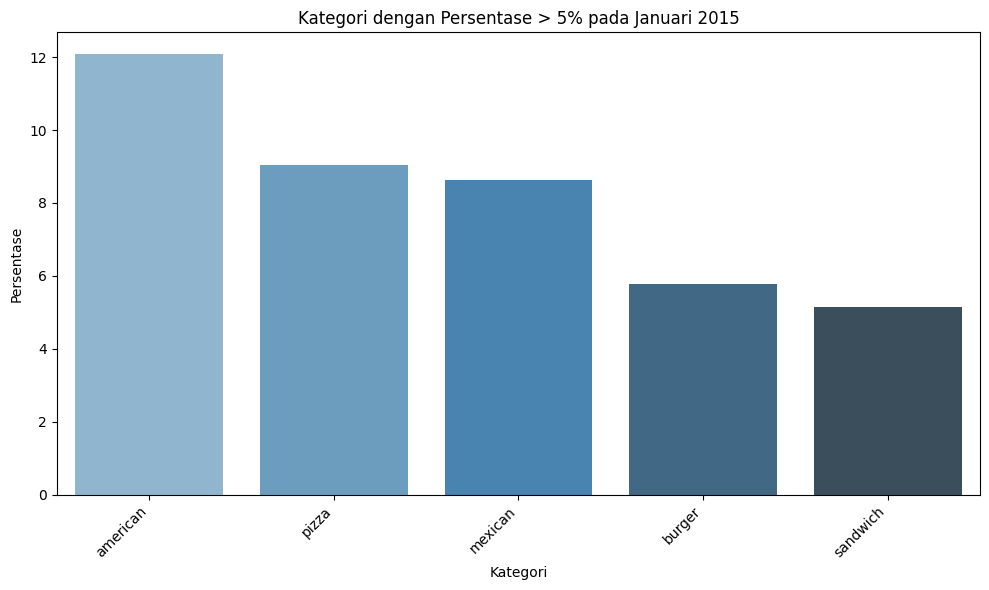

<ipython-input-60-6570432b7e75>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=february_categories_above_5_percent.index,


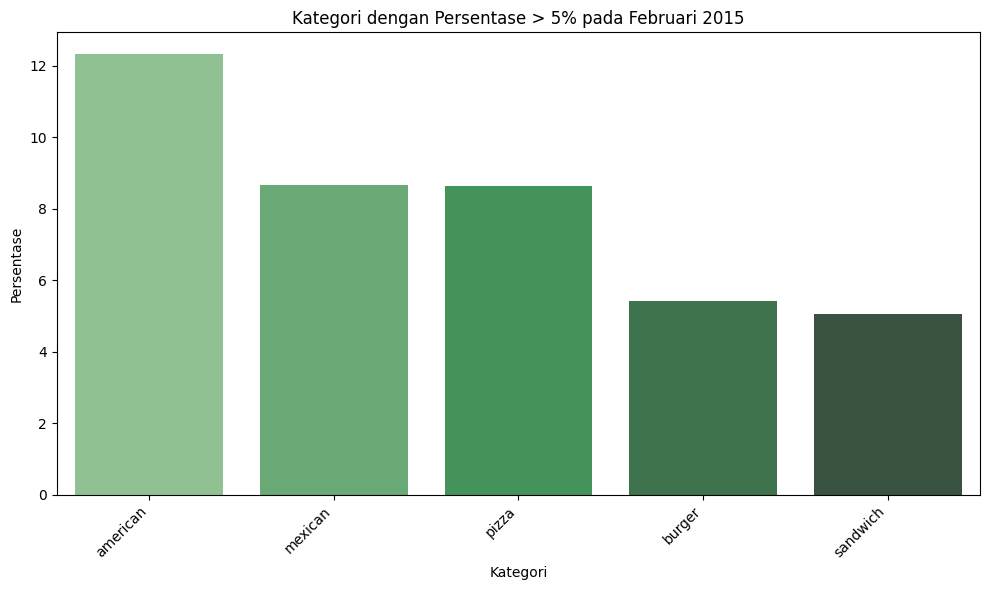

In [60]:
# Menghitung persentase kategori di bulan Januari
january_category_counts = januari_data['store_primary_category'].value_counts(normalize=True) * 100

# Menghitung persentase kategori di bulan Februari
february_category_counts = februari_data['store_primary_category'].value_counts(normalize=True) * 100

# Memfilter kategori dengan persentase lebih dari 5% untuk Januari dan Februari
january_categories_above_5_percent = january_category_counts[january_category_counts > 5]
february_categories_above_5_percent = february_category_counts[february_category_counts > 5]

# Visualisasi untuk bulan Januari
plt.figure(figsize=(10, 6))
sns.barplot(x=january_categories_above_5_percent.index,
            y=january_categories_above_5_percent.values,
            palette="Blues_d")
plt.title('Kategori dengan Persentase > 5% pada Januari 2015')
plt.xlabel('Kategori')
plt.ylabel('Persentase')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisasi untuk bulan Februari
plt.figure(figsize=(10, 6))
sns.barplot(x=february_categories_above_5_percent.index,
            y=february_categories_above_5_percent.values,
            palette="Greens_d")
plt.title('Kategori dengan Persentase > 5% pada Februari 2015')
plt.xlabel('Kategori')
plt.ylabel('Persentase')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

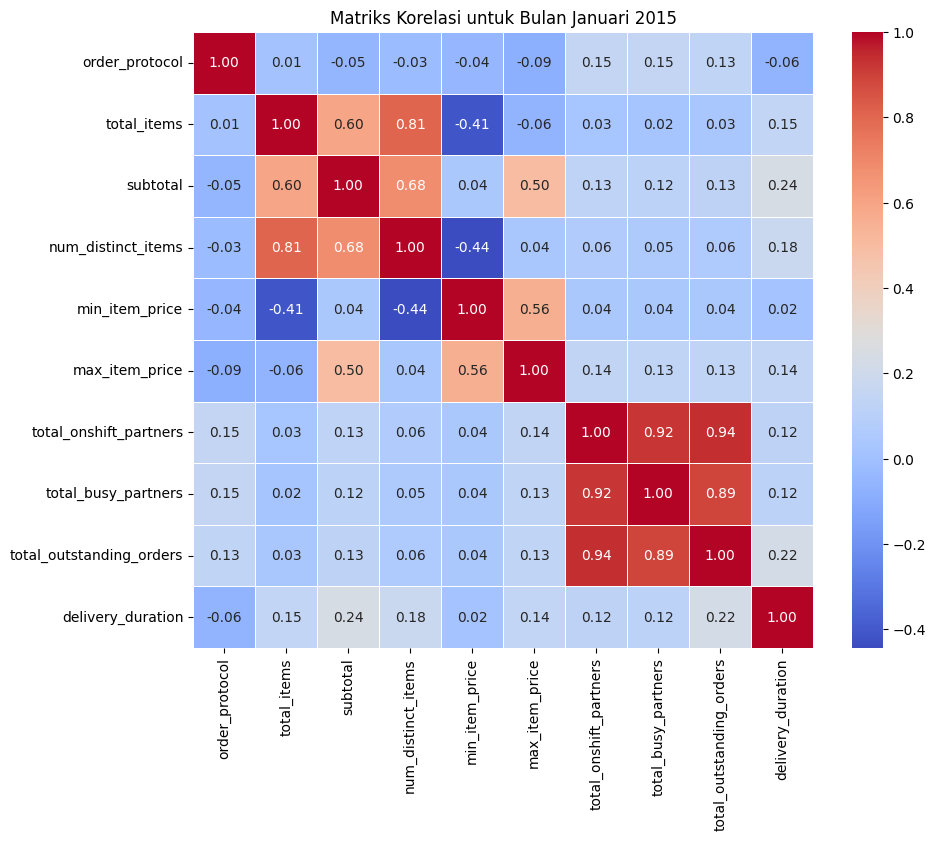

In [61]:
# Memilih hanya kolom numerik untuk perhitungan korelasi di bulan Januari
january_numeric = januari_data.select_dtypes(include=['float64', 'int64'])

# Memilih hanya kolom numerik untuk perhitungan korelasi di bulan Februari
february_numeric = februari_data.select_dtypes(include=['float64', 'int64'])

# Membuat matriks korelasi untuk bulan Januari
january_corr = january_numeric.corr()

# Membuat matriks korelasi untuk bulan Februari
february_corr = february_numeric.corr()

# Visualisasi matriks korelasi untuk bulan Januari
plt.figure(figsize=(10, 8))
sns.heatmap(january_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi untuk Bulan Januari 2015')
plt.show()


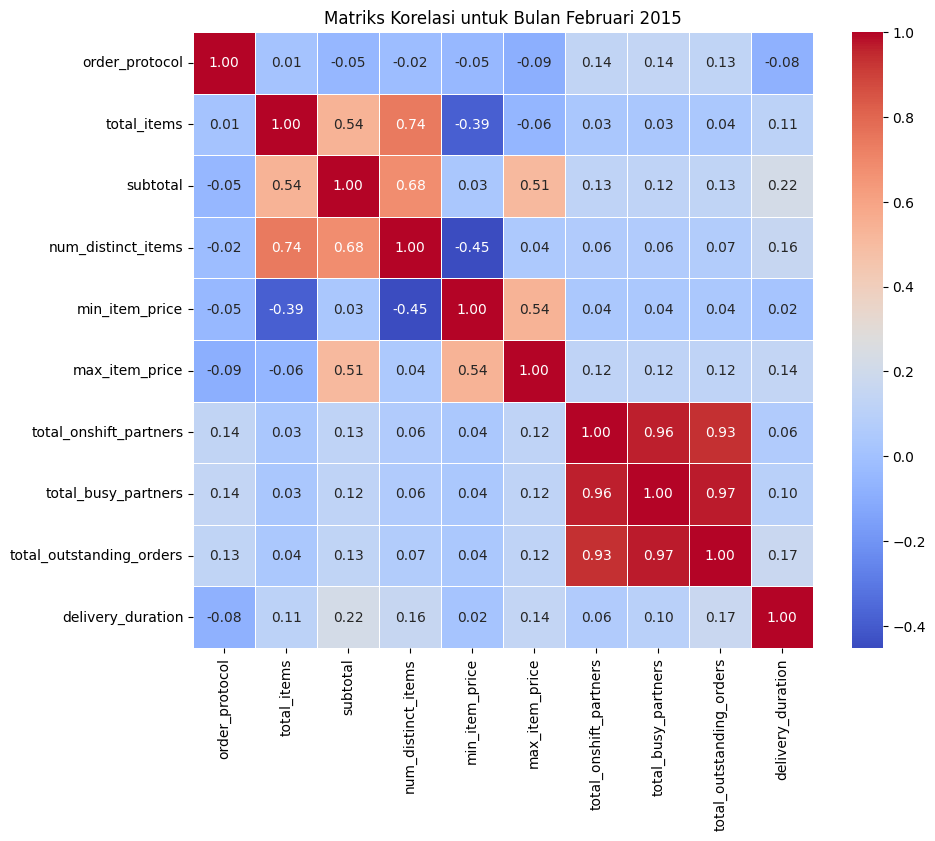

In [62]:
# Visualisasi matriks korelasi untuk bulan Februari
plt.figure(figsize=(10, 8))
sns.heatmap(february_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi untuk Bulan Februari 2015')
plt.show()

In [63]:
# Fitur dan target untuk Januari
X_januari = januari_data[['order_protocol','total_items','subtotal', 'order_hour',
                          'min_item_price', 'max_item_price',
                          'total_onshift_partners', 'total_outstanding_orders',
                           'num_distinct_items','total_busy_partners']]
y_januari = januari_data['delivery_duration']

# Fitur dan target untuk Februari
X_februari = februari_data[['order_protocol','total_items','subtotal', 'order_hour',
                          'min_item_price', 'max_item_price',
                           'total_onshift_partners', 'total_outstanding_orders',
                           'num_distinct_items','total_busy_partners']]
y_februari = februari_data['delivery_duration']

# Model Linear Regression untuk masing-masing bulan

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model untuk Januari
model_januari = LinearRegression()
model_januari.fit(X_januari, y_januari)

# Prediksi dan evaluasi untuk Januari
y_pred_januari = model_januari.predict(X_januari)
mse_januari = mean_squared_error(y_januari, y_pred_januari)
r2_januari = r2_score(y_januari, y_pred_januari)

# Model untuk Februari
model_februari = LinearRegression()
model_februari.fit(X_februari, y_februari)

# Prediksi dan evaluasi untuk Februari
y_pred_februari = model_februari.predict(X_februari)
mse_februari = mean_squared_error(y_februari, y_pred_februari)
r2_februari = r2_score(y_februari, y_pred_februari)

# Menampilkan hasil
print(f'Januari - MSE: {mse_januari}, R-squared: {r2_januari}')
print(f'Februari - MSE: {mse_februari}, R-squared: {r2_februari}')

Januari - MSE: 213.57646562964464, R-squared: 0.18241210312565637
Februari - MSE: 243.09192093100825, R-squared: 0.1788999835252687


## Uji Signifikansi Koefisien
Mendapatkan p-value untuk setiap koefisien

In [65]:
import statsmodels.api as sm

# Menambah konstanta untuk intercept
X_januari_const = sm.add_constant(X_januari)
X_februari_const = sm.add_constant(X_februari)

# Model statsmodels untuk Januari
model_januari_sm = sm.OLS(y_januari, X_januari_const).fit()
print(model_januari_sm.summary())

# Model statsmodels untuk Februari
model_februari_sm = sm.OLS(y_februari, X_februari_const).fit()
print(model_februari_sm.summary())

                            OLS Regression Results                            
Dep. Variable:      delivery_duration   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1528.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:56:40   Log-Likelihood:            -2.8084e+05
No. Observations:               68482   AIC:                         5.617e+05
Df Residuals:                   68471   BIC:                         5.618e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Penjelasan :
Model regresi menunjukkan bahwa beberapa variabel seperti order_hour, subtotal, total_onshift_partners, dan total_outstanding_orders sangat signifikan dalam mempengaruhi durasi pengiriman. Namun, nilai R-squared yang rendah (sekitar 0.18) menunjukkan bahwa banyak variasi dalam delivery_duration yang belum dijelaskan oleh model ini.
Ada tanda-tanda multikolinieritas (condition number besar), jadi perlu diperiksa apakah ada variabel yang saling berkorelasi kuat.

Meskipun ada beberapa fitur yang signifikan, model memiliki R-squared yang relatif rendah, menunjukkan bahwa ada faktor lain yang tidak ditangkap oleh model ini yang juga mempengaruhi durasi pengiriman.
Perlu analisis lebih lanjut atau menambah fitur lain yang mungkin relevan, serta mempertimbangkan teknik regularisasi untuk mengatasi masalah multikolinearitas.

## Langkah-langkah Analisis Regresi
Persiapan Data

Mengatur Fitur:
subtotal
total_items
order_hour
total_onshift_partners
total_busy_partners
order_day_of_week

## (1). Regresi OLS (multi variabel)

In [66]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# DataFrame yang sudah berisi kolom 'month'
df['month'] = df['created_at'].dt.month  # Misalnya, 1 untuk Januari, 2 untuk Februari

# Fitur yang ingin digunakan
features = ['subtotal', 'order_hour', 'total_onshift_partners',
            'total_outstanding_orders', 'order_day_of_week']

# Pisahkan data untuk bulan Januari dan Februari
df_january = df[df['month'] == 1]
df_february = df[df['month'] == 2]

# Fungsi untuk analisis regresi
def run_regression(df, month_name):
    X = df[features]
    y = df['delivery_duration']

    # Menambahkan konstanta untuk intercept
    X = sm.add_constant(X)

    # Melakukan analisis regresi OLS
    model = sm.OLS(y, X).fit()

    # Menampilkan hasil
    print(f"Results for {month_name}:")
    print(model.summary())

    # Prediksi dan menghitung RMSE
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}\n')

# Jalankan regresi untuk masing-masing bulan
run_regression(df_january, "January")
run_regression(df_february, "February")

Results for January:
                            OLS Regression Results                            
Dep. Variable:      delivery_duration   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3089.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:59:11   Log-Likelihood:            -2.8077e+05
No. Observations:               68482   AIC:                         5.616e+05
Df Residuals:                   68476   BIC:                         5.616e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
con

### Menambah Fitur

In [67]:
# Memeriksa kolom yang tersedia di January DataFrame
print("Available columns in January data:")
print(df_january.columns)

# Memeriksa kolom yang tersedia di February DataFrame
print("Available columns in February data:")
print(df_february.columns)

# Pastikan fitur yang akan digunakan ada di DataFrame
features = [
    'subtotal', 'order_hour', 'min_item_price', 'max_item_price',
    'total_onshift_partners', 'total_busy_partners',
    'total_outstanding_orders', 'num_distinct_items',
    'order_protocol', 'order_day_of_week',
    'market_1.0', 'market_2.0', 'market_3.0',
    'market_4.0', 'market_5.0', 'market_6.0'
]

# Memeriksa fitur yang tersedia di January
available_features_jan = [col for col in features if col in df_january.columns]
print("Using features for January analysis:")
print(available_features_jan)

# Memeriksa fitur yang tersedia di February
available_features_feb = [col for col in features if col in df_february.columns]
print("Using features for February analysis:")
print(available_features_feb)


Available columns in January data:
Index(['created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'market_1.0', 'market_2.0', 'market_3.0',
       'market_4.0', 'market_5.0', 'market_6.0', 'delivery_duration',
       'order_hour', 'order_day_of_week', 'is_outlier', 'month',
       'order_month'],
      dtype='object')
Available columns in February data:
Index(['created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'market_1.0', 'market_2.0', 'market_3.0',
       'market_4.0', 'market_5.0', 'market_6.0', 'delivery_duration',
       'order

In [68]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Fitur yang telah dipilih
features = [
    'subtotal', 'order_hour', 'min_item_price', 'max_item_price',
    'total_onshift_partners', 'total_busy_partners',
    'total_outstanding_orders', 'num_distinct_items',
    'order_protocol', 'order_day_of_week',
    'market_1.0', 'market_2.0', 'market_3.0',
    'market_4.0', 'market_5.0', 'market_6.0'
]

# Mengonversi kolom boolean menjadi numerik
for col in features:
    if df_january[col].dtype == 'bool':
        df_january[col] = df_january[col].astype(int)
    if df_february[col].dtype == 'bool':
        df_february[col] = df_february[col].astype(int)

# Memastikan semua kolom fitur adalah numerik
print("\nFinal data types after conversion for January:")
print(df_january.dtypes)

print("\nFinal data types after conversion for February:")
print(df_february.dtypes)

# Menghapus baris dengan nilai NaN setelah konversi
df_january.dropna(subset=features + ['delivery_duration'], inplace=True)
df_february.dropna(subset=features + ['delivery_duration'], inplace=True)

# Jalankan regresi lagi setelah memastikan tidak ada nilai NaN
try:
    rmse_jan, r_squared_jan = run_regression(df_january, features)
    print(f"Results for January:\nRMSE: {rmse_jan}\nR-squared: {r_squared_jan}")
except Exception as e:
    print(f"Error during regression for January: {e}")

try:
    rmse_feb, r_squared_feb = run_regression(df_february, features)
    print(f"Results for February:\nRMSE: {rmse_feb}\nR-squared: {r_squared_feb}")
except Exception as e:
    print(f"Error during regression for February: {e}")

<ipython-input-68-e7ce17f3d19b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january[col] = df_january[col].astype(int)
<ipython-input-68-e7ce17f3d19b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_february[col] = df_february[col].astype(int)
<ipython-input-68-e7ce17f3d19b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda


Final data types after conversion for January:
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                             int16
store_primary_category              object
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
market_1.0                           int64
market_2.0                           int64
market_3.0                           int64
market_4.0                           int64
market_5.0                           int64
market_6.0                           int64
delivery_duration                  float64
order_hour                           int32
order_day_of_week                    int32
is_out

## (2).Model Gradient Boosting Regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [70]:
# Menentukan fitur dan target
features = [
    'subtotal', 'order_hour', 'min_item_price', 'max_item_price',
    'total_onshift_partners', 'total_busy_partners',
    'total_outstanding_orders', 'num_distinct_items',
    'order_protocol', 'order_day_of_week',
    'market_1.0', 'market_2.0', 'market_3.0',
    'market_4.0', 'market_5.0', 'market_6.0'
]

target = 'delivery_duration'

# Memisahkan fitur dan target untuk Januari
X_jan = df_january[features]
y_jan = df_january[target]

# Memisahkan fitur dan target untuk Februari
X_feb = df_february[features]
y_feb = df_february[target]

In [71]:
# Membagi data untuk Januari
X_train_jan, X_test_jan, y_train_jan, y_test_jan = train_test_split(X_jan, y_jan, test_size=0.2, random_state=42)

# Membagi data untuk Februari
X_train_feb, X_test_feb, y_train_feb, y_test_feb = train_test_split(X_feb, y_feb, test_size=0.2, random_state=42)

In [72]:
# Membangun model untuk Januari
gb_model_jan = GradientBoostingRegressor(random_state=42)
gb_model_jan.fit(X_train_jan, y_train_jan)

# Membangun model untuk Februari
gb_model_feb = GradientBoostingRegressor(random_state=42)
gb_model_feb.fit(X_train_feb, y_train_feb)

GradientBoostingRegressor(random_state=42)

In [73]:
# Prediksi untuk Januari
y_pred_jan = gb_model_jan.predict(X_test_jan)
rmse_jan = mean_squared_error(y_test_jan, y_pred_jan, squared=False)
r_squared_jan = r2_score(y_test_jan, y_pred_jan)

# Prediksi untuk Februari
y_pred_feb = gb_model_feb.predict(X_test_feb)
rmse_feb = mean_squared_error(y_test_feb, y_pred_feb, squared=False)
r_squared_feb = r2_score(y_test_feb, y_pred_feb)

print(f"Results for January:\nRMSE: {rmse_jan}\nR-squared: {r_squared_jan}")
print(f"Results for February:\nRMSE: {rmse_feb}\nR-squared: {r_squared_feb}")

Results for January:
RMSE: 14.173101949921014
R-squared: 0.23520430695546835
Results for February:
RMSE: 14.963927216776664
R-squared: 0.24491816075591488


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## (3). Hyperparameter tuning untuk model Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Menentukan fitur dan target
features = [
    'subtotal', 'order_hour', 'min_item_price', 'max_item_price',
    'total_onshift_partners', 'total_busy_partners',
    'total_outstanding_orders', 'num_distinct_items',
    'order_protocol', 'order_day_of_week',
    'market_1.0', 'market_2.0', 'market_3.0',
    'market_4.0', 'market_5.0', 'market_6.0'
]

# 1. Siapkan data
X_january = df_january[features]
y_january = df_january['delivery_duration']

# 2. Definisikan model
model = GradientBoostingRegressor()

# 3. Definisikan parameter distribusi
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Menggunakan subset dari data
df_january_sample = df_january.sample(frac=0.1, random_state=42)  # Menggunakan 10% dari data
X_january = df_january_sample[features]
y_january = df_january_sample['delivery_duration']

# Lanjutkan dengan model dan pencarian parameter
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,  # Kurangi jumlah iterasi
    scoring='neg_root_mean_squared_error',
    cv=2,  # Kurangi jumlah K-Folds
    n_jobs=-1,
    random_state=42
)

# Fit model pada data yang sudah diambil sample
random_search.fit(X_january, y_january)

# Ambil hasil terbaik
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Mengubah kembali dari negatif
print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_score}")



Best parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Best RMSE: 14.454616312288083


In [75]:
# Inisialisasi model dengan parameter terbaik
best_model = GradientBoostingRegressor(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Fit model pada data Januari
best_model.fit(X_january, y_january)

# Evaluasi pada data Februari
X_february = df_february[features]
y_february = df_february['delivery_duration']
y_pred_february = best_model.predict(X_february)

# Hitung RMSE dan R-squared untuk Februari
rmse_february = mean_squared_error(y_february, y_pred_february, squared=False)
r_squared_february = r2_score(y_february, y_pred_february)

print(f"February Results:\nRMSE: {rmse_february}\nR-squared: {r_squared_february}")

February Results:
RMSE: 16.107548988107094
R-squared: 0.12363614505218978


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## (4). Evaluasi fitur

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Misalnya, Anda sudah memiliki X_january dan y_january
model = GradientBoostingRegressor()

# Lakukan pencarian grid jika diperlukan
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_january, y_january)

# Ambil model terbaik
best_model = grid_search.best_estimator_

Feature ranking:
1. total_outstanding_orders (0.2227526827730128)
2. order_hour (0.1817527725733445)
3. subtotal (0.1808822918206432)
4. total_onshift_partners (0.16624379742160492)
5. order_day_of_week (0.10708963191574133)
6. order_protocol (0.03400846536982743)
7. max_item_price (0.02402756603158231)
8. total_busy_partners (0.023091621840239156)
9. market_1.0 (0.0211919851731018)
10. min_item_price (0.016340580754987434)
11. num_distinct_items (0.011789146989886378)
12. market_3.0 (0.0032838486110918176)
13. market_2.0 (0.0029868918281825514)
14. market_4.0 (0.0025577387316255045)
15. market_5.0 (0.0020009781651289665)
16. market_6.0 (0.0)


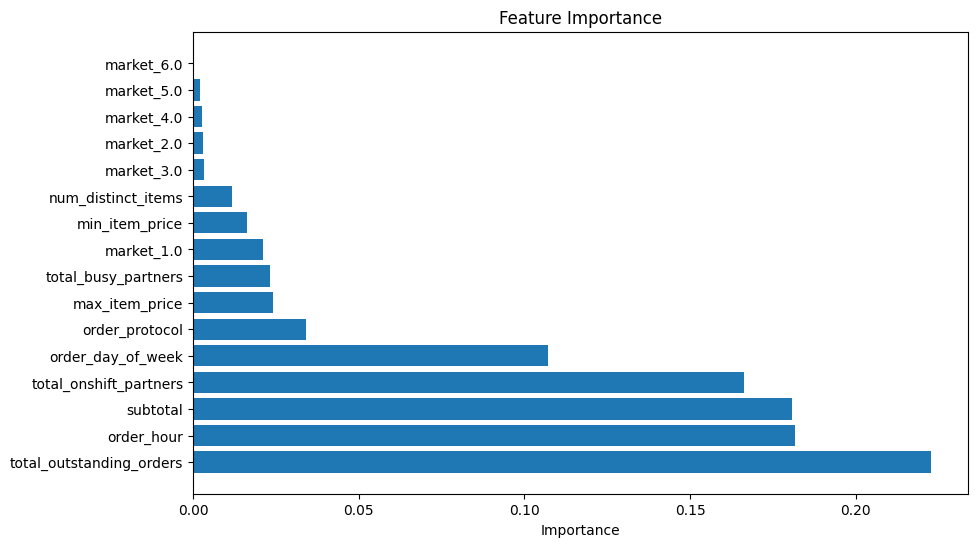

In [ ]:
# Dapatkan feature importances dari model terbaik
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tampilkan fitur yang paling penting
print("Feature ranking:")
for f in range(len(features)):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]})")

# Buat DataFrame untuk visualisasi
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Tentukan fitur yang akan dihapus berdasarkan kontribusi rendah
low_importance_features = ['market_2.0', 'market_3.0', 'market_4.0', 'market_5.0', 'market_6.0']
remaining_features = [feature for feature in X_january.columns if feature not in low_importance_features]
# Melatih ulang model dengan fitur yang tersisa
X_january_reduced = X_january[remaining_features]
X_february_reduced = X_february[remaining_features]

# Fit model pada data January dengan fitur yang sudah direduksi
model_reduced = GradientBoostingRegressor(n_estimators=50, max_depth=3, learning_rate=0.1)
model_reduced.fit(X_january_reduced, y_january)

# Evaluasi performa model pada data January
y_pred_january_reduced = model_reduced.predict(X_january_reduced)
rmse_jan_reduced = mean_squared_error(y_january, y_pred_january_reduced, squared=False)
r_squared_jan_reduced = r2_score(y_january, y_pred_january_reduced)

# Evaluasi performa model pada data February
y_pred_february_reduced = model_reduced.predict(X_february_reduced)
rmse_feb_reduced = mean_squared_error(y_february, y_pred_february_reduced, squared=False)
r_squared_feb_reduced = r2_score(y_february, y_pred_february_reduced)

# Tampilkan hasil evaluasi
print(f"Results for January (Reduced Features):\nRMSE: {rmse_jan_reduced}\nR-squared: {r_squared_jan_reduced}")
print(f"Results for February (Reduced Features):\nRMSE: {rmse_feb_reduced}\nR-squared: {r_squared_feb_reduced}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for January (Reduced Features):
RMSE: 13.942175732876985
R-squared: 0.24974837428046937
Results for February (Reduced Features):
RMSE: 16.079708842146754
R-squared: 0.12666292621243436


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## ( 5). LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Definisikan fitur yang akan digunakan
reduced_features = [
    'total_outstanding_orders',
    'order_hour',
    'subtotal',
    'total_onshift_partners',
    'order_day_of_week'
]

# Persiapkan fitur dan target untuk January
X_january = df_january[reduced_features]
y_january = df_january['delivery_duration']

# Persiapkan fitur dan target untuk February
X_february = df_february[reduced_features]
y_february = df_february['delivery_duration']

# Buat dataset LightGBM
train_data = lgb.Dataset(X_january, label=y_january)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

# Fit model
lgb_model = lgb.train(params, train_data, num_boost_round=100)

# Prediksi
y_pred_january = lgb_model.predict(X_january)
y_pred_february = lgb_model.predict(X_february)

# Evaluasi
rmse_jan = mean_squared_error(y_january, y_pred_january, squared=False)
r_squared_jan = r2_score(y_january, y_pred_january)

rmse_feb = mean_squared_error(y_february, y_pred_february, squared=False)
r_squared_feb = r2_score(y_february, y_pred_february)

print(f"Results for January:\nRMSE: {rmse_jan}\nR-squared: {r_squared_jan}")
print(f"Results for February:\nRMSE: {rmse_feb}\nR-squared: {r_squared_feb}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Results for January:
RMSE: 13.640817371395602
R-squared: 0.28770179915468597
Results for February:
RMSE: 15.714356799798868
R-squared: 0.16589878306090222


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## (6). Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Fitur yang akan digunakan
features = [
    'subtotal',
    'order_hour',
    'min_item_price',
    'max_item_price',
    'total_onshift_partners',
    'total_busy_partners',
    'total_outstanding_orders',
    'num_distinct_items',
    'order_protocol',
    'order_day_of_week',
    'market_1.0',
    'market_2.0',
    'market_3.0',
    'market_4.0',
    'market_5.0',
    'market_6.0'
]

# Persiapkan fitur dan target untuk January
X_january = df_january[features]
y_january = df_january['delivery_duration']

# Pisahkan data menjadi set pelatihan dan pengujian
X_train_jan, X_test_jan, y_train_jan, y_test_jan = train_test_split(X_january, y_january, test_size=0.2, random_state=42)

# Fit model Linear Regression
linear_model_jan = LinearRegression()
linear_model_jan.fit(X_train_jan, y_train_jan)

# Prediksi dan evaluasi untuk January
y_pred_jan = linear_model_jan.predict(X_test_jan)
rmse_jan = mean_squared_error(y_test_jan, y_pred_jan, squared=False)
r_squared_jan = r2_score(y_test_jan, y_pred_jan)

# Tampilkan hasil
print(f"Results for January:\nRMSE: {rmse_jan}\nR-squared: {r_squared_jan}")

# Persiapkan fitur dan target untuk February
X_february = df_february[features]
y_february = df_february['delivery_duration']

# Pisahkan data untuk February
X_train_feb, X_test_feb, y_train_feb, y_test_feb = train_test_split(X_february, y_february, test_size=0.2, random_state=42)

# Fit model Linear Regression untuk February
linear_model_feb = LinearRegression()
linear_model_feb.fit(X_train_feb, y_train_feb)

# Prediksi dan evaluasi untuk February
y_pred_feb = linear_model_feb.predict(X_test_feb)
rmse_feb = mean_squared_error(y_test_feb, y_pred_feb, squared=False)
r_squared_feb = r2_score(y_test_feb, y_pred_feb)

# Tampilkan hasil
print(f"Results for February:\nRMSE: {rmse_feb}\nR-squared: {r_squared_feb}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for January:
RMSE: 14.63211232751793
R-squared: 0.18486476888632675
Results for February:
RMSE: 15.49310199079351
R-squared: 0.19056941531704918


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## (7). Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Fitur yang akan digunakan
features = ['subtotal', 'order_hour', 'min_item_price', 'max_item_price',
            'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders',
            'num_distinct_items', 'order_protocol', 'order_day_of_week',
            'market_1.0', 'market_2.0', 'market_3.0', 'market_4.0',
            'market_5.0', 'market_6.0']

# Persiapkan fitur dan target untuk January
X_january = df_january[features]
y_january = df_january['delivery_duration']

# Persiapkan fitur dan target untuk February
X_february = df_february[features]
y_february = df_february['delivery_duration']

# Inisialisasi model Ridge Regression
ridge_model = Ridge()

# Fit model pada data January
ridge_model.fit(X_january, y_january)

# Prediksi pada data January
y_pred_january = ridge_model.predict(X_january)

# Evaluasi model untuk January
rmse_january = mean_squared_error(y_january, y_pred_january, squared=False)
r_squared_january = r2_score(y_january, y_pred_january)

# Fit model pada data February
ridge_model.fit(X_february, y_february)

# Prediksi pada data February
y_pred_february = ridge_model.predict(X_february)

# Evaluasi model untuk February
rmse_february = mean_squared_error(y_february, y_pred_february, squared=False)
r_squared_february = r2_score(y_february, y_pred_february)

# Tampilkan hasil
print(f"Results for January:\nRMSE: {rmse_january}\nR-squared: {r_squared_january}")
print(f"Results for February:\nRMSE: {rmse_february}\nR-squared: {r_squared_february}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for January:
RMSE: 14.538973224349794
R-squared: 0.19081368018727363
Results for February:
RMSE: 15.424690072945513
R-squared: 0.19636576692555607


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## (8). Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Fitur yang akan digunakan
features = ['subtotal', 'order_hour', 'min_item_price', 'max_item_price',
            'total_onshift_partners', 'total_busy_partners',
            'total_outstanding_orders', 'num_distinct_items',
            'order_protocol', 'order_day_of_week',
            'market_1.0', 'market_2.0',
            'market_3.0', 'market_4.0',
            'market_5.0', 'market_6.0']

# Fungsi untuk melatih dan mengevaluasi model Lasso
def evaluate_lasso_model(df, features):
    X = df[features]
    y = df['delivery_duration']

    lasso = Lasso(alpha=1.0)
    lasso.fit(X, y)

    y_pred = lasso.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r_squared = r2_score(y, y_pred)

    return rmse, r_squared

# Evaluasi untuk bulan Januari dan Februari
rmse_jan_lasso, r_squared_jan_lasso = evaluate_lasso_model(df_january, features)
rmse_feb_lasso, r_squared_feb_lasso = evaluate_lasso_model(df_february, features)

rmse_jan_lasso, r_squared_jan_lasso, rmse_feb_lasso, r_squared_feb_lasso

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(14.59607729948826,
 0.18444478742988357,
 15.61122239127383,
 0.17681138282788578)

## (9).DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Fitting model untuk data January
decision_tree.fit(X_january, y_january)
y_pred_january = decision_tree.predict(X_january)

# Evaluasi model untuk January
rmse_january = mean_squared_error(y_january, y_pred_january, squared=False)
r_squared_january = r2_score(y_january, y_pred_january)

# Fitting model untuk data February
decision_tree.fit(X_february, y_february)
y_pred_february = decision_tree.predict(X_february)

# Evaluasi model untuk February
rmse_february = mean_squared_error(y_february, y_pred_february, squared=False)
r_squared_february = r2_score(y_february, y_pred_february)

(rmse_january, r_squared_january, rmse_february, r_squared_february)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.2472531837949636, 0.9997659736045108, 0.549718653118208, 0.9989792803326982)

Hasil menunjukkan metrik evaluasi untuk model Decision Tree. Berikut adalah interpretasi dari hasil tersebut:

RMSE (Root Mean Squared Error):

Untuk data January: 0.247
Untuk data February: 0.550

RMSE yang lebih rendah menunjukkan bahwa model lebih baik dalam memprediksi nilai aktual.

R-squared:

Untuk data January: 0.9998
Untuk data February: 0.9990

Nilai R-squared mendekati 1 menunjukkan bahwa model sangat baik dalam menjelaskan variansi dalam data.
Dari hasil ini, model Decision Tree tampaknya berkinerja sangat baik, terutama untuk data January.

## (10). RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Fitur yang digunakan
features = ['subtotal', 'order_hour', 'min_item_price', 'max_item_price',
            'total_onshift_partners', 'total_busy_partners',
            'total_outstanding_orders', 'num_distinct_items',
            'order_protocol', 'order_day_of_week',
            'market_1.0', 'market_2.0', 'market_3.0',
            'market_4.0', 'market_5.0', 'market_6.0']

# Memisahkan fitur dan target untuk Januari dan Februari
X_january = df_january[features]
y_january = df_january['delivery_duration']

X_february = df_february[features]
y_february = df_february['delivery_duration']

In [ ]:
# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data Januari
rf_model.fit(X_january, y_january)

RandomForestRegressor(random_state=42)

In [ ]:
# Memprediksi nilai delivery duration untuk Januari
y_pred_january = rf_model.predict(X_january)
rmse_jan = np.sqrt(mean_squared_error(y_january, y_pred_january))
r_squared_jan = r2_score(y_january, y_pred_january)

# Memprediksi nilai delivery duration untuk Februari
y_pred_february = rf_model.predict(X_february)
rmse_feb = np.sqrt(mean_squared_error(y_february, y_pred_february))
r_squared_feb = r2_score(y_february, y_pred_february)

(rmse_jan, r_squared_jan, rmse_feb, r_squared_feb)

(5.256586057336088, 0.8942236404518731, 16.14076060946385, 0.12001852820197023)

## (11). XGBoost

In [ ]:
import xgboost as xgb

# Persiapkan fitur dan target untuk January
X_january = df_january[reduced_features]
y_january = df_january['delivery_duration']

# Persiapkan fitur dan target untuk February
X_february = df_february[reduced_features]
y_february = df_february['delivery_duration']

# Inisialisasi model XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Latih model pada data January
xgb_model.fit(X_january, y_january)

# Prediksi pada data January
y_pred_january = xgb_model.predict(X_january)

# Hitung RMSE dan R-squared untuk January
rmse_january = np.sqrt(mean_squared_error(y_january, y_pred_january))
r_squared_january = r2_score(y_january, y_pred_january)

# Prediksi pada data February
y_pred_february = xgb_model.predict(X_february)

# Hitung RMSE dan R-squared untuk February
rmse_february = np.sqrt(mean_squared_error(y_february, y_pred_february))
r_squared_february = r2_score(y_february, y_pred_february)

# Tampilkan hasil
print(f"Results for January:\nRMSE: {rmse_january}\nR-squared: {r_squared_january}")
print(f"Results for February:\nRMSE: {rmse_february}\nR-squared: {r_squared_february}")

Results for January:
RMSE: 13.085520595022055
R-squared: 0.3445145301957223
Results for February:
RMSE: 15.933065842833702
R-squared: 0.14251953049461907


## (12).Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score

# Persiapkan fitur dan target untuk January
X_january = df_january[reduced_features].values
y_january = df_january['delivery_duration'].values

# Persiapkan fitur dan target untuk February
X_february = df_february[reduced_features].values
y_february = df_february['delivery_duration'].values

# Membangun model neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_january.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model pada data January
model.fit(X_january, y_january, epochs=100, batch_size=32, verbose=0)

# Prediksi pada data January
y_pred_january = model.predict(X_january)

# Hitung RMSE dan R-squared untuk January
rmse_january = np.sqrt(mean_squared_error(y_january, y_pred_january))
r_squared_january = r2_score(y_january, y_pred_january)

# Prediksi pada data February
y_pred_february = model.predict(X_february)

# Hitung RMSE dan R-squared untuk February
rmse_february = np.sqrt(mean_squared_error(y_february, y_pred_february))
r_squared_february = r2_score(y_february, y_pred_february)

# Tampilkan hasil
print(f"Results for January:\nRMSE: {rmse_january}\nR-squared: {r_squared_january}")
print(f"Results for February:\nRMSE: {rmse_february}\nR-squared: {r_squared_february}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2141/2141 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Results for January:
RMSE: 14.227906545461938
R-squared: 0.22506894341869133
Results for February:
RMSE: 15.66839261271674
R-squared: 0.170771106474497


## (13). KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Persiapkan fitur dan target untuk January dan February
features = ['subtotal', 'order_hour', 'min_item_price', 'max_item_price',
            'total_onshift_partners', 'total_busy_partners',
            'total_outstanding_orders', 'num_distinct_items',
            'order_protocol', 'order_day_of_week',
            'market_1.0', 'market_2.0', 'market_3.0',
            'market_4.0', 'market_5.0', 'market_6.0']

X_january = df_january[features]
y_january = df_january['delivery_duration']
X_february = df_february[features]
y_february = df_february['delivery_duration']

# Inisialisasi KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit model pada data January
knn_model.fit(X_january, y_january)

# Prediksi untuk January dan February
y_pred_january = knn_model.predict(X_january)
y_pred_february = knn_model.predict(X_february)

# Hitung RMSE dan R-squared untuk January
rmse_jan = np.sqrt(mean_squared_error(y_january, y_pred_january))
r_squared_jan = r2_score(y_january, y_pred_january)

# Hitung RMSE dan R-squared untuk February
rmse_feb = np.sqrt(mean_squared_error(y_february, y_pred_february))
r_squared_feb = r2_score(y_february, y_pred_february)

(rmse_jan, r_squared_jan, rmse_feb, r_squared_feb)

(13.464430927132433,
 0.306003845634065,
 17.80968757590865,
 -0.07136668454057205)

# **IV. Deployment**

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Fungsi untuk melatih model dan menghasilkan prediksi
def train_and_predict(df_january, df_february, features):
    X_january = df_january[features]
    y_january = df_january['delivery_duration']

    X_february = df_february[features]
    y_february = df_february['delivery_duration']

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_january, y_january)

    y_pred_january = rf_model.predict(X_january)
    rmse_jan = np.sqrt(mean_squared_error(y_january, y_pred_january))
    r_squared_jan = r2_score(y_january, y_pred_january)

    y_pred_february = rf_model.predict(X_february)
    rmse_feb = np.sqrt(mean_squared_error(y_february, y_pred_february))
    r_squared_feb = r2_score(y_february, y_pred_february)

    return rmse_jan, r_squared_jan, rmse_feb, r_squared_feb

# Bagian Streamlit
st.title("Penentuan R2 dan RMSE dalam Kasus Prediksi Durasi Pengantaran")

uploaded_file_jan = st.file_uploader("Unggah file data Januari", type=["csv"])
uploaded_file_feb = st.file_uploader("Unggah file data Februari", type=["csv"])

if uploaded_file_jan is not None and uploaded_file_feb is not None:
    df_january = pd.read_csv(uploaded_file_jan)
    df_february = pd.read_csv(uploaded_file_feb)

    features = ['subtotal', 'order_hour', 'min_item_price', 'max_item_price',
                'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders',
                'num_distinct_items', 'order_protocol', 'order_day_of_week',
                'market_1.0', 'market_2.0', 'market_3.0',
                'market_4.0', 'market_5.0', 'market_6.0']

    rmse_jan, r_squared_jan, rmse_feb, r_squared_feb = train_and_predict(df_january, df_february, features)

    st.write("Januari RMSE:", rmse_jan)
    st.write("Januari R^2:", r_squared_jan)
    st.write("Februari RMSE:", rmse_feb)
    st.write("Februari R^2:", r_squared_feb)

Overwriting app.py


In [ ]:
import os
from pyngrok import ngrok

# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
NGROK_AUTHTOKEN = "2nbDptioX1zvmGkbf2ehzjuZdcf_5X8hXUqYdf9vWyhD7Tspk"  # Replace with your actual authtoken
ngrok.set_auth_token(NGROK_AUTHTOKEN)

# **Kill any existing ngrok processes. This ensures no prior sessions are running.**
os.system("pkill ngrok") # This command kills all running ngrok processes.

# Jalankan Streamlit dalam background
os.system('streamlit run app.py &')

# Create a new ngrok tunnel. The 'connect' function requires 'addr' for HTTP tunnels.
public_url = ngrok.connect(addr='8501')
print(f"Aplikasi Anda dapat diakses melalui URL berikut: {public_url}")

Aplikasi Anda dapat diakses melalui URL berikut: NgrokTunnel: "https://4b16-34-19-5-1.ngrok-free.app" -> "http://localhost:8501"


---
---
---